In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#for coordinate in coordinates:
 #   print(coordinate[0], coordinate[1])

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fb468a3f5fa906b026cfdd3bb7524a74


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | xique-xique
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | quang ngai
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | diego de almagro
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | challans
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | sapouy
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 

Processing Record 34 of Set 4 | mehran
Processing Record 35 of Set 4 | kenai
Processing Record 36 of Set 4 | whitehorse
Processing Record 37 of Set 4 | solnechnyy
Processing Record 38 of Set 4 | kirakira
Processing Record 39 of Set 4 | brae
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | nhulunbuy
Processing Record 42 of Set 4 | anar darreh
City not found. Skipping...
Processing Record 43 of Set 4 | eskasem
City not found. Skipping...
Processing Record 44 of Set 4 | vanavara
Processing Record 45 of Set 4 | serik
Processing Record 46 of Set 4 | nsanje
Processing Record 47 of Set 4 | dolores
Processing Record 48 of Set 4 | caldas novas
Processing Record 49 of Set 4 | sangar
Processing Record 50 of Set 4 | ginir
Processing Record 1 of Set 5 | kayes
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | kadykchan
City not fou

Processing Record 26 of Set 8 | viligili
City not found. Skipping...
Processing Record 27 of Set 8 | soledade
Processing Record 28 of Set 8 | torbay
Processing Record 29 of Set 8 | vangaindrano
Processing Record 30 of Set 8 | totness
Processing Record 31 of Set 8 | paralimni
Processing Record 32 of Set 8 | gravdal
Processing Record 33 of Set 8 | omihachiman
Processing Record 34 of Set 8 | canavieiras
Processing Record 35 of Set 8 | khandagayty
Processing Record 36 of Set 8 | praia
Processing Record 37 of Set 8 | wakema
Processing Record 38 of Set 8 | parbhani
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | celestun
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | kommunisticheskiy
Processing Record 43 of Set 8 | benguela
Processing Record 44 of Set 8 | souillac
Processing Record 45 of Set 8 | olafsvik
Processing Record 46 of Set 8 | jumla
Processing Record 47 of Set 8 | sayaxche
Processing Record 48 of Set 8 | kieta
Processing Rec

Processing Record 13 of Set 12 | mabaruma
Processing Record 14 of Set 12 | dudinka
Processing Record 15 of Set 12 | arroyo grande
Processing Record 16 of Set 12 | montes altos
Processing Record 17 of Set 12 | ternate
Processing Record 18 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 12 | baruun-urt
Processing Record 20 of Set 12 | te anau
Processing Record 21 of Set 12 | tabou
Processing Record 22 of Set 12 | danane
Processing Record 23 of Set 12 | broken hill
Processing Record 24 of Set 12 | tonder
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | yirol
City not found. Skipping...
Processing Record 27 of Set 12 | lakes entrance
Processing Record 28 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 29 of Set 12 | balikpapan
Processing Record 30 of Set 12 | lerwick
Processing Record 31 of Set 12 | portree
Processing Record 32 of Set 12 | igrim
Processing Record 33 of Set 12 | mongomo
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,66.97,82,100,24.76,PF,2020-08-20 22:02:21
1,Xique-Xique,-10.82,-42.73,77.43,44,89,3.24,BR,2020-08-20 22:02:22
2,Bluff,-46.60,168.33,46.99,98,100,1.01,NZ,2020-08-20 22:02:22
3,Jamestown,42.10,-79.24,77.00,46,1,6.93,US,2020-08-20 22:02:22
4,Yellowknife,62.46,-114.35,57.20,50,20,5.82,CA,2020-08-20 22:02:22
5,Raudeberg,61.99,5.14,63.00,91,87,4.25,NO,2020-08-20 22:02:22
6,Quang Ngai,15.12,108.80,74.91,90,100,5.32,VN,2020-08-20 22:02:23
7,Diego De Almagro,-26.37,-70.05,61.05,31,0,6.06,CL,2020-08-20 22:02:23
8,Longyearbyen,78.22,15.64,41.00,86,75,6.93,SJ,2020-08-20 22:02:23
9,Ilulissat,69.22,-51.10,48.20,57,5,2.24,GL,2020-08-20 22:02:23


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-20 22:02:21,-23.12,-134.97,66.97,82,100,24.76
1,Xique-Xique,BR,2020-08-20 22:02:22,-10.82,-42.73,77.43,44,89,3.24
2,Bluff,NZ,2020-08-20 22:02:22,-46.60,168.33,46.99,98,100,1.01
3,Jamestown,US,2020-08-20 22:02:22,42.10,-79.24,77.00,46,1,6.93
4,Yellowknife,CA,2020-08-20 22:02:22,62.46,-114.35,57.20,50,20,5.82
5,Raudeberg,NO,2020-08-20 22:02:22,61.99,5.14,63.00,91,87,4.25
6,Quang Ngai,VN,2020-08-20 22:02:23,15.12,108.80,74.91,90,100,5.32
7,Diego De Almagro,CL,2020-08-20 22:02:23,-26.37,-70.05,61.05,31,0,6.06
8,Longyearbyen,SJ,2020-08-20 22:02:23,78.22,15.64,41.00,86,75,6.93
9,Ilulissat,GL,2020-08-20 22:02:23,69.22,-51.10,48.20,57,5,2.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/20/20'

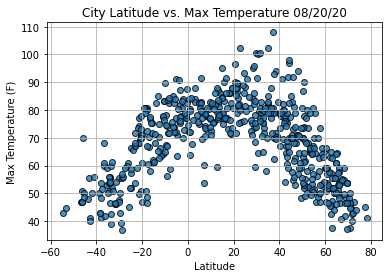

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

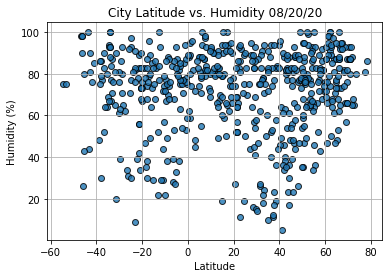

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

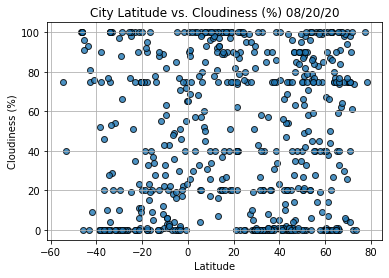

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

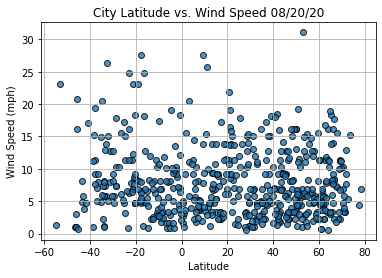

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2020-08-20 22:02:24
Lat                         32.67
Lng                         -17.1
Max Temp                     75.2
Humidity                       78
Cloudiness                     20
Wind Speed                   2.24
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: Lat, Length: 569, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2020-08-20 22:02:22,42.10,-79.24,77.00,46,1,6.93
4,Yellowknife,CA,2020-08-20 22:02:22,62.46,-114.35,57.20,50,20,5.82
5,Raudeberg,NO,2020-08-20 22:02:22,61.99,5.14,63.00,91,87,4.25
6,Quang Ngai,VN,2020-08-20 22:02:23,15.12,108.80,74.91,90,100,5.32
8,Longyearbyen,SJ,2020-08-20 22:02:23,78.22,15.64,41.00,86,75,6.93
...,...,...,...,...,...,...,...,...,...
563,Ha Tinh,VN,2020-08-20 22:00:11,18.33,105.90,76.42,91,97,3.18
564,Leshukonskoye,RU,2020-08-20 22:04:51,64.90,45.76,46.33,95,0,3.33
565,Akhtanizovskaya,RU,2020-08-20 22:04:51,45.32,37.10,69.80,77,40,8.95
566,Gimli,CA,2020-08-20 22:04:51,50.63,-96.99,90.00,95,21,6.08


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

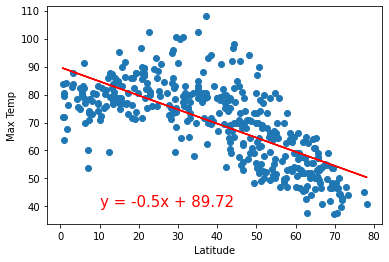

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

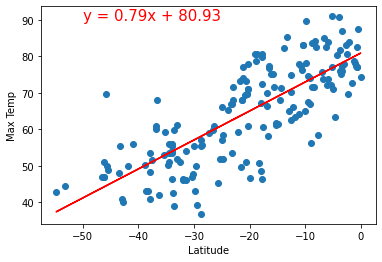

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

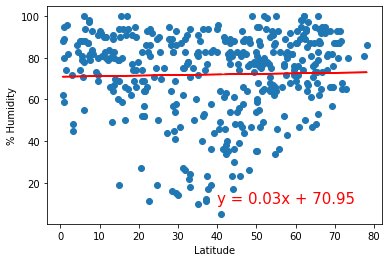

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

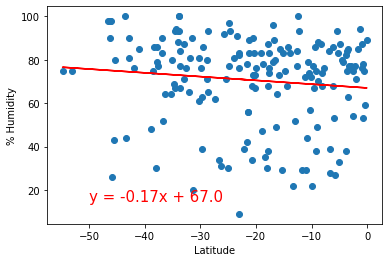

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

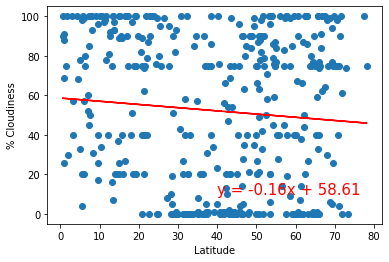

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

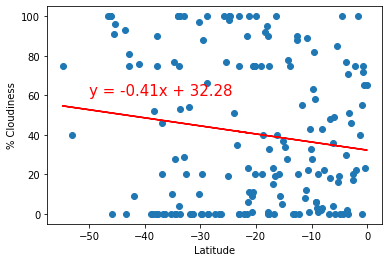

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

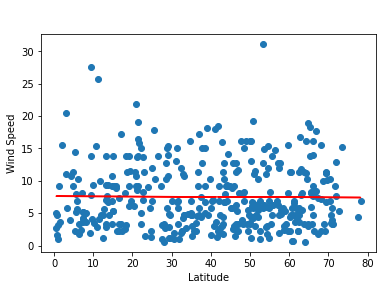

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for Wind Speed', 'Wind Speed',(40,35))

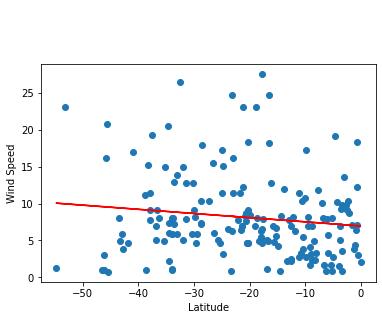

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))